# MATH 210 Introduction to Mathematical Computing

## April 3, 2017

* Example: basketball-reference.com
    * Creating a .csv file from text
        * Cleveland scores (2015-16 NBA season)
    * Using `.map` on Series and `.apply` on DataFrames to create new columns
        * Point differential per game
    * Using `.concat` to put DataFrames together
        * Compare Cleveland v. Golden State

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Example: basketball-reference.com

NBA stats are compiled and freely available at [basketball-reference.com](http://www.basketball-reference.com/). However, to build larger datasets (such as scores for each of the total 1230 games played in an NBA season), we need to copy and paste text and create our own .csv files. Let's try it for jsut the 82 games played by the [Cleveland Cavaliers](http://www.nba.com/cavaliers/) and also the [Golden State Warriors](http://www.nba.com/warriors/).

### Creating a .csv file from text: Cleveland scores (2015-16 NBA season)

Go to [basketball-reference.com](http://www.basketball-reference.com/) and navigate to the page for [Cleveland's regular season games table](http://www.basketball-reference.com/teams/CLE/2017_games.html). Click "Share & more" and "Modify & Share Table".

We click the symbols $\times$ to remove all the unwanted columns and rows. Keep the 8 columns: G, Date, Opponent, (Blank - W or L column), Tm, Opp, W and L. Remove the rows with column headers embedded in the middle of the table. The result is 82 rows for each of the 82 games.

Click "Get table as CSV" and we simply copy the text. The top few lines of the file are:

```

G,Date,Opponent,,Tm,Opp,W,L
,,,,,,,
1,Tue Oct 25 2016,New York Knicks,W,117,88,1,0
2,Fri Oct 28 2016,Toronto Raptors,W,94,91,2,0
3,Sat Oct 29 2016,Orlando Magic,W,105,99,3,0
4,Tue Nov 1 2016,Houston Rockets,W,128,120,4,0
5,Thu Nov 3 2016,Boston Celtics,W,128,122,5,0
```

From the Jupyter main page, open a new text file using the New menu, and then paste the text. We can manually delete the second line (which is empty with just commas) and also enter a name "W/L" for the W or L column. Finally, save the file as `CLE-season.csv`.

We created our own .csv file from text we copied from an HTML table on the internet! Let's import it!

In [2]:
cleveland = pd.read_csv("CLE-season.csv",index_col=0,parse_dates=[1])

In [3]:
cleveland.head()

,Date,Opponent,W/L,Tm,Opp,W,L
G,,,,,,,
1,2015-10-27,Chicago Bulls,L,95,97,0,1
2,2015-10-28,Memphis Grizzlies,W,106,76,1,1
3,2015-10-30,Miami Heat,W,102,92,2,1
4,2015-11-02,Philadelphia 76ers,W,107,100,3,1
5,2015-11-04,New York Knicks,W,96,86,4,1


In [4]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 1 to 82
Data columns (total 7 columns):
Date        82 non-null datetime64[ns]
Opponent    82 non-null object
W/L         82 non-null object
Tm          82 non-null int64
Opp         82 non-null int64
W           82 non-null int64
L           82 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.1+ KB


### Use .map on Series and .apply on DataFrames to create new columns

Let's create a new column for the point differential per game: Cleveland's points minus opponents points in a game. Use the `.apply` method.

In [5]:
cleveland['Diff'] = cleveland.apply(lambda row : row['Tm'] - row['Opp'],axis=1)

The `.apply` method (with `axis=1`) allows use the row entries to create a new value. Notice that we are defining an anonymous lambda function which takes in a row and returns the difference between the `Tm` and `Opp` columns.

In [6]:
cleveland.head()

,Date,Opponent,W/L,Tm,Opp,W,L,Diff
G,,,,,,,,
1,2015-10-27,Chicago Bulls,L,95,97,0,1,-2
2,2015-10-28,Memphis Grizzlies,W,106,76,1,1,30
3,2015-10-30,Miami Heat,W,102,92,2,1,10
4,2015-11-02,Philadelphia 76ers,W,107,100,3,1,7
5,2015-11-04,New York Knicks,W,96,86,4,1,10


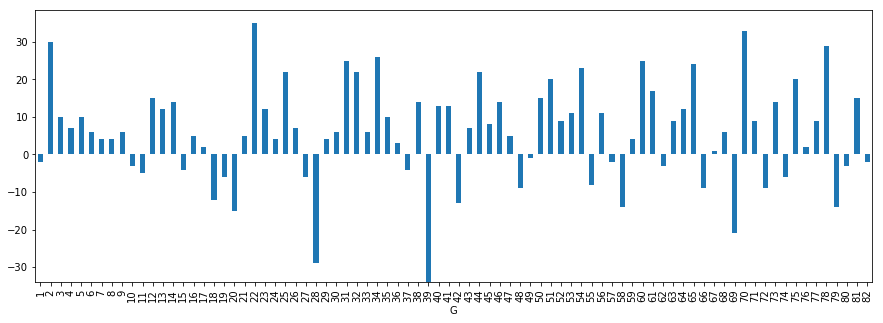

In [7]:
cleveland['Diff'].plot(kind='bar',figsize=(15,5))

The worst game for Cleveland in 2015-2016 is Game #39 when they lost by over 30 points. Who was that against?

In [8]:
cleveland.loc[39]

Date          2016-01-18 00:00:00
Opponent    Golden State Warriors
W/L                             L
Tm                             98
Opp                           132
W                              28
L                              11
Diff                          -34
Name: 39, dtype: object

Golden State Warriors!

#### lambda functions

Recall, [lambda functions](http://stackoverflow.com/questions/890128/why-are-python-lambdas-useful) are just a short way to define a regular function. For example:

In [9]:
def fun(x):
    return x**2

In [10]:
fun(3)

9

In [11]:
# Define a function in one line using the lambda keyword and name the function fun
fun = lambda x : x**2

In [12]:
fun(3)

9

### Golden State scores (2015-16 NBA season)

Let's create a .csv file for the Golden State game scores from 2015-2016 in the same way we did for Cleveland above.

In [13]:
golden_state = pd.read_csv("GS-season.csv",index_col=0,parse_dates=[1])

In [14]:
golden_state.head()

,Date,Opponent,W/L,Tm,Opp,W,L
G,,,,,,,
1,2015-10-27,New Orleans Pelicans,W,111,95,1,0
2,2015-10-30,Houston Rockets,W,112,92,2,0
3,2015-10-31,New Orleans Pelicans,W,134,120,3,0
4,2015-11-02,Memphis Grizzlies,W,119,69,4,0
5,2015-11-04,Los Angeles Clippers,W,112,108,5,0


In [15]:
golden_state['Diff'] = golden_state.apply(lambda row : row['Tm'] - row['Opp'],axis=1)

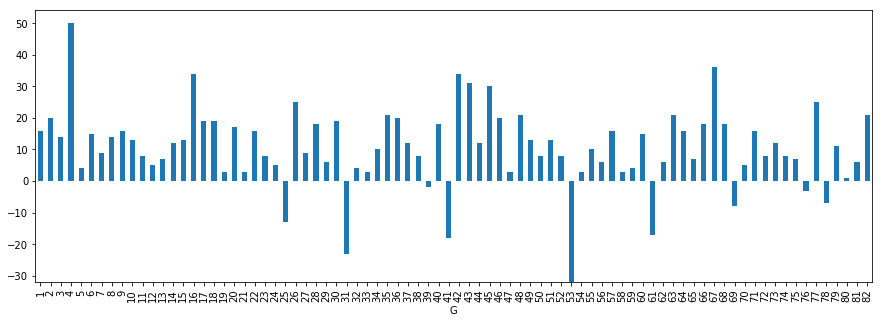

In [16]:
golden_state['Diff'].plot(kind='bar',figsize=(15,5))

Wow! Who did Golden State beat by 50 points in game 4?

In [17]:
golden_state.loc[4]

Date        2015-11-02 00:00:00
Opponent      Memphis Grizzlies
W/L                           W
Tm                          119
Opp                          69
W                             4
L                             0
Diff                         50
Name: 4, dtype: object

### Compare seasons: Cleveland v. Golden State

We can put the two plots together in compare.

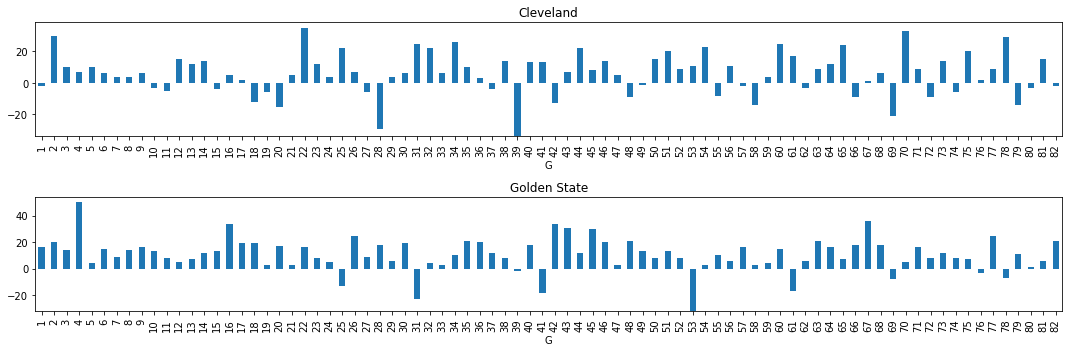

In [18]:
plt.subplot(2,1,1)
cleveland['Diff'].plot(kind='bar',figsize=(15,5),title='Cleveland')
plt.subplot(2,1,2)
golden_state['Diff'].plot(kind='bar',figsize=(15,5),title='Golden State')
plt.tight_layout()

Let's create new columns in each data frame for Win differential (Wins - Losses), create a new frame with these columns and plot them together.

In [19]:
cleveland['W/L Diff'] = cleveland.apply(lambda row : row['W'] - row['L'],axis=1)
golden_state['W/L Diff'] = golden_state.apply(lambda row : row['W'] - row['L'],axis=1)

Now we can concatenate the columns into a new dataframe. Check out the documentation for `pd.concat`:

In [20]:
pd.concat?

Create a new dataframe from the Win column of each team.

In [21]:
win_diff = pd.concat([cleveland['W/L Diff'],golden_state['W/L Diff']],axis=1)

In [22]:
win_diff.columns = ['Cleveland','Golden State']

In [23]:
win_diff.head()

,Cleveland,Golden State
G,,
1,-1,1
2,0,2
3,1,3
4,2,4
5,3,5


In [24]:
win_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 1 to 82
Data columns (total 2 columns):
Cleveland       82 non-null int64
Golden State    82 non-null int64
dtypes: int64(2)
memory usage: 1.9 KB


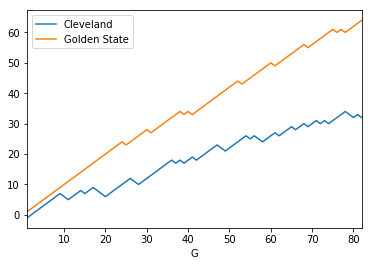

In [25]:
win_diff.plot()